# Intro to numpy

- `numpy` stands for numerical python
- the `numpy` library is optimized for linear algebra routines, and is very fast
- the starring role is played by the `ndarray`, which is a vector
- `pandas` is built on `numpy`
- documentation is available on [numpy.org](http://www.numpy.org/)

In [3]:
import numpy as np  # numpy is always aliased as 'np'

### ndarray

An `ndarray` is very similar to a list...

In [4]:
l = [3, 4.7, 2, 0, 1.2, 1]
print l, type(l)

[3, 4.7, 2, 0, 1.2, 1] <type 'list'>


In [5]:
a = np.array(l)
print a, type(a)

[ 3.   4.7  2.   0.   1.2  1. ] <type 'numpy.ndarray'>


In [6]:
a[0]

3.0

In [7]:
a[2:6]

array([ 2. ,  0. ,  1.2,  1. ])

In [8]:
a[-2:]

array([ 1.2,  1. ])

In [9]:
a[::-1]  # reverse order

array([ 1. ,  1.2,  0. ,  2. ,  4.7,  3. ])

...but a little bit fancier...

In [10]:
a[2:4] = 0
a

array([ 3. ,  4.7,  0. ,  0. ,  1.2,  1. ])

In [11]:
a[2:4] = a[0:2]
a

array([ 3. ,  4.7,  3. ,  4.7,  1.2,  1. ])

In [12]:
a[-2:] += 3
a

array([ 3. ,  4.7,  3. ,  4.7,  4.2,  4. ])

In [13]:
a[-2:] *= a[:2]
a

array([  3. ,   4.7,   3. ,   4.7,  12.6,  18.8])

... and it behaves like a vector:

In [14]:
b = 3 * a
b

array([  9. ,  14.1,   9. ,  14.1,  37.8,  56.4])

In [15]:
1 + a

array([  4. ,   5.7,   4. ,   5.7,  13.6,  19.8])

In [16]:
a + b

array([ 12. ,  18.8,  12. ,  18.8,  50.4,  75.2])

In [17]:
a * b   # element-wise multiplication

array([   27.  ,    66.27,    27.  ,    66.27,   476.28,  1060.32])

In [18]:
a ** 2  # element-wise multiplication

array([   9.  ,   22.09,    9.  ,   22.09,  158.76,  353.44])

In [19]:
a.dot(b)  # dot product

1723.1400000000003

Note that division by zero raises a warning only, and puts an `inf` in the vector.

In [20]:
1. / a  # element-wise division

array([ 0.33333333,  0.21276596,  0.33333333,  0.21276596,  0.07936508,
        0.05319149])

**Vectorization vs broadcasting**
- Using `numpy` arrays enables you to express many kinds of data processing tasks as concise array expressions that might otherwise require *writing loops*. 
- This practice of replacing explicit loops with array expressions is commonly referred to as *vectorization*. 
- In general, vectorized array operations will often be one or two (or more) orders of magnitude faster than their pure Python equivalents, with the biggest impact in any kind of numerical computations.
- Any arithmetic operations between equal-size arrays applies the operation elementwise
- Broadcasting describes how arithmetic works between arrays of different shapes. It is a very powerful feature, but one that can be easily misunderstood, even by experienced users. The simplest example of broadcasting occurs when combining a scalar value with an array.

McKinney, Wes (2012-10-08). _Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython_ (p. 97). O'Reilly Media. Kindle Edition. 

In [21]:
print a * b   # vectorization: element-wise multiplication
print a * 3   # broadcasting

[   27.      66.27    27.      66.27   476.28  1060.32]
[  9.   14.1   9.   14.1  37.8  56.4]


### Typing

Also note that all elements of an `ndarray` have the same type

In [22]:
a.dtype

dtype('float64')

In [23]:
np.array([1,2,3])

array([1, 2, 3])

In [24]:
np.array([1,2.0,3])

array([ 1.,  2.,  3.])

In [25]:
np.array([1,2,"3"])

array(['1', '2', '3'], 
      dtype='|S21')

- It is often necessary to recast data types from one type to another. 
- This is especially handy when converting data to float after reading a text file.
- Note that `astype` creates a new copy of the array.

In [26]:
a

array([  3. ,   4.7,   3. ,   4.7,  12.6,  18.8])

In [27]:
a.astype(int)

array([ 3,  4,  3,  4, 12, 18])

In [28]:
b = a.astype(str)
b

array(['3.0', '4.7', '3.0', '4.7', '12.6', '18.8'], 
      dtype='|S32')

In [29]:
b.astype(float)

array([  3. ,   4.7,   3. ,   4.7,  12.6,  18.8])

### Shape and reshaping

In [30]:
len(a)  # get number of elements in ndarray (just like a list)

6

In [31]:
a.shape  # `shape` gives you a tuple with the length in each dimension

(6,)

In [32]:
len(a.shape)  # This is a way to find out the dimension of your vextor or matrix

1

In [33]:
a.ndim  # This is a better way to find that out

1

Let's transform our vector into a 2x3 matrix.

In [34]:
A = a.reshape(2,3)  
A

array([[  3. ,   4.7,   3. ],
       [  4.7,  12.6,  18.8]])

In [35]:
A.shape  # a 2x3 matrix

(2, 3)

In [36]:
len(A.shape)  # this is 2-dimensional

2

In [37]:
A.ndim

2

### Standard arrays

There are a number of helper functions to create arrays from scratch

In [38]:
a = np.zeros(10)
a

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

You can specify the type, if desired.

In [39]:
a1 = np.zeros(5, dtype=np.int)
a2 = np.zeros(5, dtype=np.float)
a3 = np.ones(5, dtype=np.int)
a4 = np.ones(5, dtype=np.float)
print a1, a2, a3, a4

[0 0 0 0 0] [ 0.  0.  0.  0.  0.] [1 1 1 1 1] [ 1.  1.  1.  1.  1.]


Or create a matrix of ones or zeros.

In [40]:
A = np.zeros((4, 9))
A

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

- You can create a range with `np.arange`
- Note the difference with python's `range`, which creates a list

In [41]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [42]:
np.arange(5, 10)

array([5, 6, 7, 8, 9])

In [43]:
np.arange(5, 10, 2)

array([5, 7, 9])

- Use `np.linspace` for creating evenly spaced numbers over a specified interval
- Note that the boundaries are _included_ in `linspace`, but not in `arange` (or `range` for that matter)

In [44]:
np.linspace(5, 10, 10)

array([  5.        ,   5.55555556,   6.11111111,   6.66666667,
         7.22222222,   7.77777778,   8.33333333,   8.88888889,
         9.44444444,  10.        ])

### Random arrays

Often you'll need a bunch of random numbers.

In [45]:
np.random.random()  # give a random number in the interval [0.0, 1.0).

0.9115671871954792

In [46]:
np.random.random(10)  # idem, in a vector with 10 elements

array([ 0.38096933,  0.75024224,  0.97850205,  0.4177252 ,  0.08444511,
        0.20547196,  0.87974184,  0.03755832,  0.25569655,  0.27908279])

In [47]:
np.random.random((4, 3))  # random 4x3 matrix

array([[ 0.35572768,  0.83686624,  0.28869892],
       [ 0.88732452,  0.09358469,  0.87602525],
       [ 0.15858631,  0.39437742,  0.60048909],
       [ 0.13329337,  0.03775074,  0.07394438]])

These random numbers are uniformly distributed:

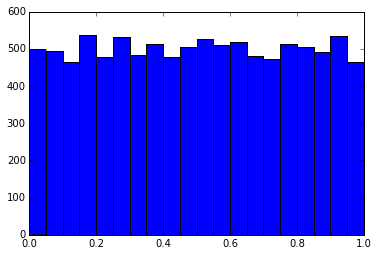

In [48]:
from matplotlib import pyplot as plt
%matplotlib inline
a = np.random.random(10000)
f = plt.hist(a, bins=20)

But other distributions are available.

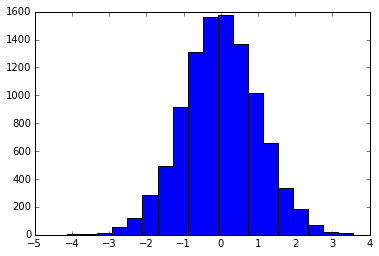

In [49]:
a = np.random.randn(10000)  # Normal distribution
f = plt.hist(a, bins=20)

Permutations and combinations are supported.

In [50]:
abc = list('ABCDEFGHI')
print np.random.permutation(10)
print np.random.permutation(abc)
print np.random.choice(10)
print np.random.choice(abc)
print np.random.choice(abc, 5, replace=True)
print np.random.choice(abc, 5, replace=False)

[4 3 1 9 5 8 6 0 2 7]
['H' 'G' 'A' 'I' 'E' 'B' 'F' 'C' 'D']
2
A
['C' 'F' 'I' 'D' 'C']
['F' 'D' 'H' 'C' 'B']


See [numpy.random documentation](http://docs.scipy.org/doc/numpy/reference/routines.random.html)
for more information.

### Performance

Note that vectorization not only makes your processing precise but also fast.

In [71]:
N = 1000
a = np.random.random(N)  # numpy array
l = list(a)  # python list

In [72]:
%time b = np.square(a)

CPU times: user 19 µs, sys: 6 µs, total: 25 µs
Wall time: 24.1 µs


In [73]:
%time m = [elt ** 2 for elt in l]

CPU times: user 395 µs, sys: 168 µs, total: 563 µs
Wall time: 448 µs


Pandas is built on top of numpy. It's faster than common python, but slower than numpy.

In [74]:
import pandas as pd
s = pd.Series(a)  # a pandas series
%time t = np.square(s)

CPU times: user 206 µs, sys: 43 µs, total: 249 µs
Wall time: 220 µs


As a side note, for comparing runtimes, people usually use `%timeit` instead of `%time`, since it measures a few loops at once.

In [77]:
%timeit b = np.square(a)
%timeit m = [elt ** 2 for elt in l]
%timeit t = np.square(s)

The slowest run took 13.06 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 1.22 µs per loop
1000 loops, best of 3: 201 µs per loop
10000 loops, best of 3: 27.9 µs per loop


For timing the entire cell, use `%%time` or `%%timeit`.

In [78]:
%%timeit
alpha = a.dot(a)
alpha += 1

The slowest run took 24.07 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 1.29 µs per loop


### Sorting

In [49]:
a = np.random.random(10)
a.sort()  # sorts in-place
print a

[ 0.06871318  0.06897655  0.20168335  0.25996983  0.39231195  0.45856343
  0.61690477  0.72920463  0.79069581  0.87216516]


Note that the sort is _in-place_, so you can't do a `print a.sort()` or something. This is a bit confusing.

In [50]:
print a.sort()

None


Matrices can be sorted, too.

In [51]:
M = np.random.random((3, 4))
M.sort()  # sort elements in each column
M

array([[  1.93036715e-01,   3.27130166e-01,   4.77130811e-01,
          6.88558384e-01],
       [  3.18156252e-04,   2.43083727e-01,   3.03245577e-01,
          6.82173011e-01],
       [  1.38927355e-01,   2.82748334e-01,   6.54473504e-01,
          7.77331927e-01]])

In [52]:
M = np.random.random((3, 4))
M.sort(axis=1)  # sort elements in each row
M

array([[ 0.37793173,  0.42906748,  0.48065884,  0.61255088],
       [ 0.28002026,  0.56026543,  0.88378076,  0.99055217],
       [ 0.18581617,  0.62707302,  0.78047844,  0.82892953]])

Find unique elements in an array

In [53]:
a = np.random.choice(abc, 100)
a

array(['G', 'A', 'F', 'B', 'F', 'F', 'E', 'G', 'G', 'D', 'F', 'C', 'G',
       'D', 'G', 'A', 'B', 'G', 'H', 'E', 'C', 'C', 'D', 'H', 'C', 'C',
       'G', 'A', 'G', 'D', 'H', 'G', 'B', 'I', 'A', 'G', 'B', 'B', 'B',
       'F', 'A', 'G', 'D', 'C', 'H', 'H', 'C', 'B', 'E', 'H', 'G', 'D',
       'I', 'A', 'G', 'G', 'I', 'D', 'C', 'A', 'E', 'H', 'A', 'G', 'B',
       'B', 'I', 'C', 'G', 'C', 'H', 'E', 'C', 'I', 'F', 'D', 'C', 'E',
       'C', 'D', 'D', 'D', 'A', 'D', 'C', 'I', 'H', 'C', 'A', 'F', 'F',
       'G', 'C', 'A', 'D', 'C', 'B', 'B', 'H', 'D'], 
      dtype='|S1')

In [54]:
print np.unique(a)

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I']


In [55]:
set(a)  # should give the same, in a set format

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'}

In [56]:
uniques, counts = np.unique(a, return_counts=True)  # count the occurances of each unique element
print zip(uniques, counts)

[('A', 11), ('B', 11), ('C', 17), ('D', 14), ('E', 6), ('F', 8), ('G', 17), ('H', 10), ('I', 6)]


### Some math

In [57]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [58]:
np.square(a)

array([ 0,  1,  4,  9, 16])

In [59]:
np.sqrt(a)

array([ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ])

In [60]:
a.mean()

2.0

In [61]:
a.std()  # standard deviation

1.4142135623730951

In [62]:
print a.min(), a.max()

0 4


In [63]:
a.sum()

10

In [64]:
a.cumsum()

array([ 0,  1,  3,  6, 10])

<hr>

# Exercises

- Create an 3x4-matrix with only zeros
- Create a 6x6-matrix with ones on the diagonal - i.e., on (1,1), (2,2), etc, - and zeros everywhere else. 
- Create a 5x3-matrix with uniformly random values between 1 and 10
- Create an array with 1000 random values form the standard normal distribution
- Given the following matrix $M$, compute the mean of each row, of each column, and of all of $M$.

In [65]:
M = np.array([[1,2,3], [4,5,6], [7,8,9]])